# **Importing necessary modules**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# **Data collection and pre-processing**

In [4]:
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

In [7]:
loan_dataset.shape

(614, 13)

In [8]:
loan_dataset.dropna(inplace = True)

In [9]:
loan_dataset.shape

(480, 13)

In [10]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
loan_dataset['Self_Employed'].replace({'Yes':1,'No':0}, inplace = True)

In [15]:
loan_dataset['Loan_Status'].replace({'Y':1,'N':0}, inplace = True)

In [17]:
loan_dataset['Dependents'].replace({'3+':4}, inplace = True)

In [22]:
loan_dataset['Married'].replace({'Yes':1,'No':0}, inplace = True)

In [24]:
loan_dataset['Gender'].replace({'Male':1,'Female':0}, inplace = True)

In [25]:
loan_dataset['Education'].replace({'Graduate':1,'Not Graduate':0}, inplace = True)

In [29]:
loan_dataset['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2}, inplace = True)

# **Visualization**

<Axes: xlabel='Education', ylabel='count'>

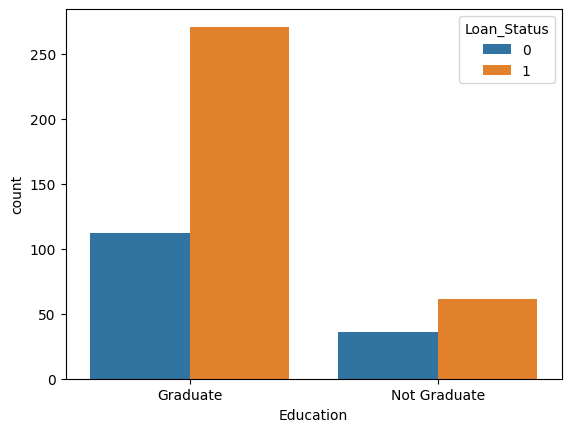

In [19]:
sns.countplot(data =loan_dataset, x = 'Education', hue = 'Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

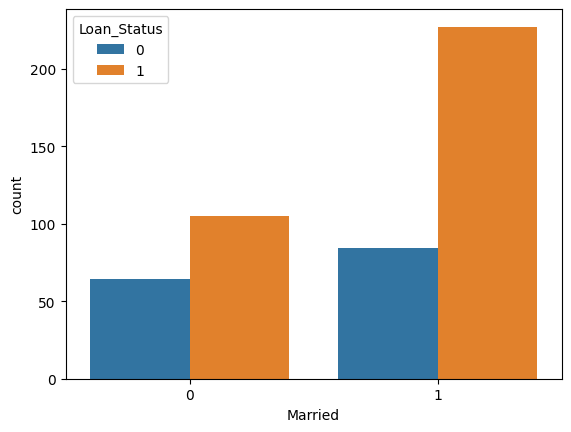

In [23]:
sns.countplot(data =loan_dataset, x = 'Married', hue = 'Loan_Status')

In [28]:
loan_dataset['Loan_Status'].replace({'Y':1,'N':0}, inplace = True)

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [30]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


# **Data pre-processing**

In [33]:
X = loan_dataset.drop(columns = ['Loan_ID','Loan_Status'])  # just seperated x and y labels
Y = loan_dataset['Loan_Status']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state=43)

In [36]:
print(X.shape,X_train.shape)

(480, 11) (432, 11)


**Support Vector Mashine Model**

In [ ]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [38]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [39]:
print(training_data_accuracy)

0.8055555555555556


In [40]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print(test_data_accuracy)

0.7708333333333334
